# Birth-death process

Recall our simple [birth–death processes](https://en.wikipedia.org/wiki/Birth%E2%80%93death_process) with a fixed constant birth rate $\mu$ for particles and a fixed death rate $\nu$ for all active particles. Going through our recipe for master equations, we ask:

*What is the set of discrete states available to the system?* The system consists of a discrete number $n$ of active particles which can take any value from 0 to infinity.

*What are the possible transitions between states?* The system will go from state $n$ to state $n+1$ when a new particle is created, and from state $n>0$ to state $n-1$ when a particle disappears.

*At what rates do these transitions occur?* $J_{n\rightarrow n+1} = \mu$ and $J_{n>0\rightarrow n-1} = n\nu$. All other transitions are impossible (null current equal to zero).

And we thus write accordingly:

$$
\begin{align}
\frac{d}{dt}P_n(t) &= -\mu P_n(t) + (n+1)\nu P_{n+1}(t) \quad \textrm{for n=0}\\
\frac{d}{dt}P_n(t) &= -(\mu + n\nu)P_n(t) + (n+1)\nu P_{n+1}(t) + \mu P_{n-1}(t) \quad \textrm{for n>0}\\
\end{align}
$$

This simple process could be a model various scenarios: evolution of bacteria or other species, an infectious disease through a contaminated environment, or really any collection of things that appears at some global rate but decays according to a local rate per "thing".

Some questions of interest are:
1. What is the distribution underlying the number of particles at time $t$?
2. How much time is spent in an inactive $n=0$ state?

To answer these questions, we need master equations and can thankfully simply integrate the system derived above. 

## Distribution of particles through time

In practice, master equations are not different than other models based on dynamical systems of ordinary differential equations. Conceptually, they are reacher as they do not simply track an average state but a distribution of states. What this means is that we can simply integrate them as we would simpler models, but will need to be a bit more careful when processing and interpreting the resulting dynamics.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_49208/3782432136.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


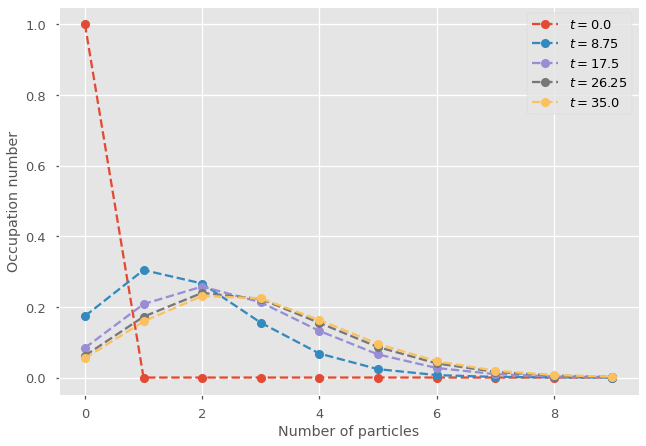

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

# We will use the odeint routine
from scipy.integrate import odeint

# Master Equations
def J(x, t, mu, nu):
    """
    Time derivative of the occupation numbers.

        * x is the state distribution (array like)
        * t is time (scalar)
        * mu is the birth rate
        * nu is the particle death rate
    """
    
    dx = 0*x
    for n in range(len(x)):
        if n==0: #for first state
            dx[0] = - mu*x[0] + nu*x[1]
        elif n==len(x)-1: #for last state
            dx[n] = -(nu*n)*x[n] + mu*x[n-1]
        else: #all other states
            dx[n] = -(mu+nu*n)*x[n] + nu*(n+1)*x[n+1] + mu*x[n-1]

    return dx

# Time of observations
t_length = 35
t_steps = 5
t_vec = np.linspace(0, t_length, t_steps)

# Initial conditions
nb_of_states = 10
x_0 = np.zeros(nb_of_states)
x_0[0] = 1

# Parameters
mu = 0.3
nu = 0.1

# Integration
G = lambda x, t: J(x, t, mu, nu)
x_path = odeint(G, x_0, t_vec)

# Plot
for t in range(t_steps):
    plt.plot(range(nb_of_states),x_path[t], marker="o", ls='--', label=fr"$t = {t_vec[t]}$")
plt.legend()
plt.ylabel('Occupation number')
plt.xlabel('Number of particles')
plt.show()

The output is a discrete distribution converging towards a steady-state with time. Play with the two parameters to get a better understanding of when the heterogeneity might be more important than the average number of particles alone.

:::{tip}
When solving master equations, the total probability density should remain at (up to numerical precision). Checking this will help you make sure you sure you did not forget boundary conditions. For example, referring to a state that you do not track ($+(n_\textrm{max}+1)\nu P_{n_\textrm{max}+1}$) will be caught by the software since the state does not exist. However, a term in the opposite direction leaving a state that you do track ($-\mu P_{n_\textrm{max}}$) will simply cause probability density to leak. Make sure your boundary conditions are correct by checking that your probability density stays at 1 (plus or minus numerical error on the 15th decimal or so).
:::

In [43]:
print(np.sum(x_path[-1]))

0.9999999999999998


## Average over time

Simple mean-field models could be used to track the average number of particles over time. We can do the same by simply summing over our occupation numbers:

$$
\langle n(t) \rangle = \sum_n nP_n(t)
$$

## Time in the inactive state

Without tracking the full distribution, it is hard to know just how active the birth-death process might be. A mean-field description could tell you that the average number of particles is steady at 1/2, but does that mean the system spends 50\% of time with zero particle and 50\% of time with one particle? Of course not, sometimes it can still have two or more particles! In some cases that might not matter, but systems with zero active agents are often in absorbing states that are somewhat ignored by mean-field approach. A predator-prey system with no prey dies, an epidemic with no cases is extinct, and so on.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_49208/1190637982.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


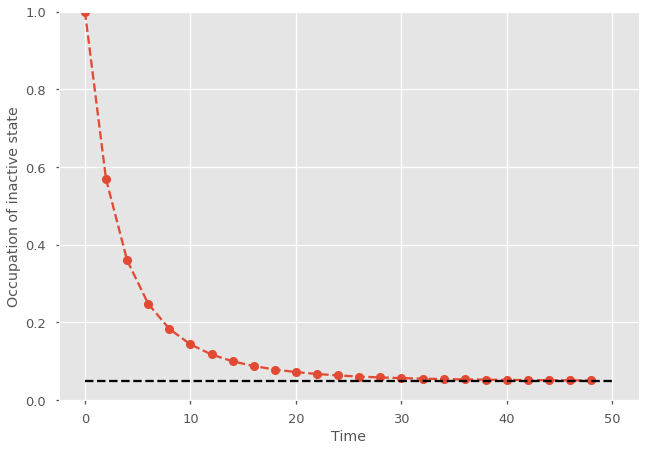

In [35]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot', 'seaborn-talk'])

# We will use the odeint routine
from scipy.integrate import odeint

# Master Equations
def J(x, t, mu, nu):
    """
    Time derivative of the occupation numbers.

        * x is the state distribution (array like)
        * t is time (scalar)
        * mu is the birth rate
        * nu is the particle death rate
    """
    
    dx = 0*x
    for n in range(len(x)):
        if n==0: #for first state
            dx[0] = - mu*x[0] + nu*x[1]
        elif n==len(x)-1: #for last state
            dx[n] = -(nu*n)*x[n] + mu*x[n-1]
        else: #all other states
            dx[n] = -(mu+nu*n)*x[n] + nu*(n+1)*x[n+1] + mu*x[n-1]

    return dx

# Time of observations
t_length = 50
t_steps = 25
t_vec = np.linspace(0, t_length, t_steps)

# Initial conditions
nb_of_states = 10
x_0 = np.zeros(nb_of_states)
x_0[0] = 1

# Parameters
mu = 0.3
nu = 0.1
T = 100

# Integration
G = lambda x, t: J(x, t, mu, nu)
x_path = odeint(G, x_0, t_vec).transpose()

# Plot
plt.plot((t_length/t_steps)*np.arange(t_steps),x_path[0], marker="o", ls='--')
plt.ylabel('Occupation of inactive state')
plt.xlabel('Time')
plt.ylim([0, 1])
plt.hlines(0.05, 0, t_length, colors='k', ls='--')
plt.show()